In [1]:
import numpy as np

In [2]:
# Hyper parameter
MAX_ITERATION = 500

# Temperature
T = 1

# Annealing coefficient
RT = 0.95

In [3]:
# Load the data
path = '../Data Set/'
data_lst = ['p07_c.txt', 'p07_p.txt', 'p07_w.txt']

with open(path + data_lst[0], 'r') as f:
    CAPACITY = int(f.read())
    print('Capacity:', CAPACITY)

PROFIT_LST = np.array([])
with open(path + data_lst[1], 'r') as f:
    for line in f:
        PROFIT_LST = np.append(PROFIT_LST, int(line))

WEIGHT_LST = np.array([])
with open(path + data_lst[2], 'r') as f:
    for line in f:
        WEIGHT_LST = np.append(WEIGHT_LST, int(line))

# Initialize the selection
selection_lst = np.array([1 ,0 ,0 ,0 ,0 ,1 ,0 ,0 ,0 ,1 ,0 ,0 ,0 ,0, 0])

print('    |Profit    ', '|Weight    ', '|Selection')
print('--------------------------------------')
for i in range(len(selection_lst)):
    print('{:<3} |{:<9}  |{:<9}  |{:<9} '.format(str(i) + '.', PROFIT_LST[i], WEIGHT_LST[i], selection_lst[i]))


        

Capacity: 750
    |Profit     |Weight     |Selection
--------------------------------------
0.  |135.0      |70.0       |1         
1.  |139.0      |73.0       |0         
2.  |149.0      |77.0       |0         
3.  |150.0      |80.0       |0         
4.  |156.0      |82.0       |0         
5.  |163.0      |87.0       |1         
6.  |173.0      |90.0       |0         
7.  |184.0      |94.0       |0         
8.  |192.0      |98.0       |0         
9.  |201.0      |106.0      |1         
10. |210.0      |110.0      |0         
11. |214.0      |113.0      |0         
12. |221.0      |115.0      |0         
13. |229.0      |118.0      |0         
14. |240.0      |120.0      |0         


In [4]:
# The function of calculating the profit by corresponding selection
def count_profit(selection_lst):
    total_profit = 0
    for i in range(len(selection_lst)):
        if selection_lst[i]:
            total_profit = total_profit + PROFIT_LST[i]
    
    return total_profit

In [5]:
# The function of calculating the weight by corresponding selection
def count_weight(selection_lst):
    total_weight = 0
    for i in range(len(selection_lst)):
        if selection_lst[i]:
            total_weight = total_weight + WEIGHT_LST[i]
    
    return total_weight    

In [6]:
# The function of changing the selection
def change_selection(selection_lst, idx):
    if selection_lst[idx] == 0:
        selection_lst[idx] = 1
    else:
        selection_lst[idx] = 0

In [7]:
# The function of deciding whether the selection should be changed
def whether_to_change(delta_f):
    r = np.random.rand()
    if (r <= np.exp(delta_f / T)):
        return True
    else:
        return False

In [8]:
# Find the optimal solution
SIZE = len(selection_lst)

# The weight and profit of initial selection
total_weight = count_weight(selection_lst)
total_profit = count_profit(selection_lst)

# Used to record profits
profit_record = np.array([total_profit])

for i in range(MAX_ITERATION):
    sel = np.random.randint(0, SIZE)
    change_selection(selection_lst, sel)
    temp_weight = count_weight(selection_lst)
    temp_profit = count_profit(selection_lst)
    
    # If the new selection can satisfy the constraint of weighy
    if (temp_weight <= CAPACITY):

        # If the new selection can have a better profit
        if (temp_profit >= total_profit):
            total_weight = temp_weight
            total_profit = temp_profit
        else:
            # If the selection can be change although it has a worse profit
            if (whether_to_change(temp_profit - total_profit)):
                total_weight = temp_weight
                total_profit = temp_profit
            else:
                change_selection(selection_lst, sel)
    
    # Record the profit
    profit_record = np.append(profit_record, total_profit)

    # Update the temperature parameter
    T = T * RT

print("Weight:", total_weight)
print("Profit:", profit_record[-1])

Weight: 749.0
Profit: 1450.0


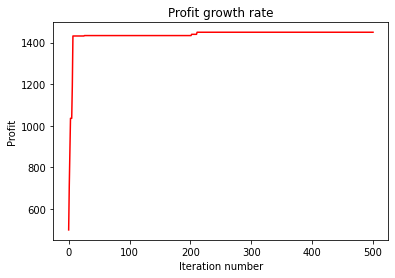

In [9]:
# Output the profit growth rate
import matplotlib.pyplot as plt

plt.figure() 
plt.plot(profit_record, 'r') 
plt.title('Profit growth rate') 
plt.xlabel('Iteration number') 
plt.ylabel('Profit') 
plt.show()